In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers,models


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/icml_face_data.csv",header=None)
data.head()

,0,1,2
0,emotion,Usage,pixels
1,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
2,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
3,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
4,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...


In [ ]:
data.tail()

,0,1,2
35883,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35884,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35885,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35886,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35887,2,PrivateTest,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...


In [ ]:
data.iloc[28708:28713]

,0,1,2
28708,0,Training,222 227 203 90 86 90 84 77 94 87 99 119 134 14...
28709,4,Training,195 199 205 206 205 203 206 209 208 210 212 21...
28710,0,PublicTest,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28711,1,PublicTest,156 184 198 202 204 207 210 212 213 214 215 21...
28712,4,PublicTest,69 118 61 60 96 121 103 87 103 88 70 90 115 12...


In [ ]:
data=data.to_numpy()

In [ ]:
data.shape

(35888, 3)

In [ ]:
training=data[1:28709]
testing=data[28710:]

In [ ]:
print(training.shape)
print(testing.shape)

(28708, 3)
(7178, 3)


In [ ]:
training_features=training[:,-1]
training_labels=training[:,0]
testing_features=testing[:,-1]
testing_labels=testing[:,0]

In [ ]:
training_labels[0]

'0'

In [ ]:
print(training_features.shape)
print(training_labels.shape)
print(testing_features.shape)
print(testing_labels.shape)

(28708,)
(28708,)
(7178,)
(7178,)


In [ ]:
training_labels=training_labels.astype('float32')
testing_labels=testing_labels.astype('float32')

In [ ]:
training_labels.shape
testing_labels.shape

(7178,)

In [ ]:
type(training_features)

numpy.ndarray

In [ ]:
testing_features.shape

(7178,)

In [ ]:
test_feature=[]
for i in range(0,7178):
  testing_features[i]=testing_features[i].split(" ")
  testing_features[i]=np.array(testing_features[i])
  testing_features[i]=testing_features[i].astype('float32')
  testing_features[i]=testing_features[i]/255
  
  for j in testing_features[i]:
   test_feature.append(j)
test_feature=np.array(test_feature)  
test_feature=test_feature.reshape(-1,48,48,1)




In [ ]:
test_feature.shape

(7178, 48, 48, 1)

In [ ]:
train_feature=[]
for i in range(0,28708):
  training_features[i]=training_features[i].split(" ")
  training_features[i]=np.array(training_features[i])
  training_features[i]=training_features[i].astype('float32')
  training_features[i]=training_features[i]/255
  for j in training_features[i]:
    train_feature.append(j)
train_feature=np.array(train_feature)  
train_feature=train_feature.reshape(-1,48,48,1)




In [ ]:
train_feature.shape

(28708, 48, 48, 1)

plt.figure()
plt.imshow(train_feature[50])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
class_names=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

In [ ]:
class_names[5]

'Surprise'

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7) )

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_feature, training_labels, epochs=20, 
                    validation_data=(test_feature,testing_labels))

Epoch 1/20
898/898 [==============================] - 81s 90ms/step - loss: 1.7331 - accuracy: 0.3019 - val_loss: 1.4891 - val_accuracy: 0.4299
Epoch 2/20
898/898 [==============================] - 80s 89ms/step - loss: 1.4331 - accuracy: 0.4549 - val_loss: 1.3407 - val_accuracy: 0.4763
Epoch 3/20
898/898 [==============================] - 80s 89ms/step - loss: 1.2718 - accuracy: 0.5149 - val_loss: 1.2931 - val_accuracy: 0.4941
Epoch 4/20
898/898 [==============================] - 80s 89ms/step - loss: 1.1825 - accuracy: 0.5562 - val_loss: 1.2458 - val_accuracy: 0.5195
Epoch 5/20
898/898 [==============================] - 80s 89ms/step - loss: 1.0839 - accuracy: 0.5953 - val_loss: 1.2215 - val_accuracy: 0.5326
Epoch 6/20
898/898 [==============================] - 80s 89ms/step - loss: 0.9713 - accuracy: 0.6367 - val_loss: 1.2332 - val_accuracy: 0.5368
Epoch 7/20
898/898 [==============================] - 80s 89ms/step - loss: 0.8841 - accuracy: 0.6766 - val_loss: 1.2804 - val_accuracy:

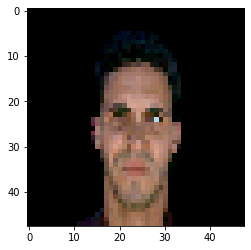

In [ ]:
img=image.load_img('/content/s007-04_img.tif',target_size=(48,48))
plt.imshow(img)

In [ ]:
X=image.img_to_array(img)
X.shape



(48, 48, 3)

In [ ]:
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
images=images.reshape(-1,48,48,1)
val=model.predict(images)


In [ ]:
print(val)

[[  1070.1301   -2355.205      374.59814   1310.3115    -873.6069
    -821.32275   -295.74283]
 [  2008.2731   -9661.127      916.08325   -551.8367    -172.24657
   -3058.4539    1610.2712 ]
 [ -1442.041   -11692.838     1839.4066   -2297.6123    1926.6101
   -4503.39      4128.8228 ]]


In [ ]:
print(np.argmax(val[0]))

3


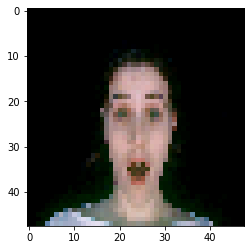

In [ ]:
im=image.load_img('/content/s006-03_img.tif',target_size=(48,48))
plt.imshow(im)
y=image.img_to_array(im)
y=np.expand_dims(y,axis=0)
imag=np.vstack([y])
imag=imag.reshape(-1,48,48,1)


In [ ]:
valu=model.predict(imag)
print(valu)

[[    42.944855  -1991.123      1577.1063       59.117596    630.43054
   -2414.7332    -1830.0947  ]
 [  -501.4186   -13533.966      2577.5073    -1181.0765     1753.2378
   -4277.655      2531.14    ]
 [  2534.97     -19332.84       1028.8524     3199.4163     -377.38358
   -7716.5483     2897.732   ]]


In [ ]:
print(np.argmax(valu[0]))

2
